# Reflectiveness classification - Natural Language Processing (NLP)
### Team Hyosang & Raniya

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv("sentences_all_hand.tsv", sep = "\t")

In [ ]:
data.head(5)

,Unnamed: 0,corpus_id,sentence_id,sentence,options,final
0,0.0,0,0.0,Zunächst habe ich meinen Arbeitsplatz vorberei...,"0,2",0
1,1.0,0,1.0,Anschließend las ich das Fallbeispiel mehrmals...,0,0
2,2.0,0,2.0,Ich bin neutral und offen an die Aufgabe heran...,"0,1",1
3,3.0,0,3.0,Nachdem ich zunächst die Aufgabe ohne Lerninha...,"0,2",2
4,4.0,0,4.0,"Die Tipps haben mir sehr geholfen, um meine Lö...",2,2


In [ ]:
# Delete unnecessary column
data.drop(data.columns[[0]], axis=1, inplace=True)

In [ ]:
data.head(5)

,corpus_id,sentence_id,sentence,options,final
0,0,0.0,Zunächst habe ich meinen Arbeitsplatz vorberei...,"0,2",0
1,0,1.0,Anschließend las ich das Fallbeispiel mehrmals...,0,0
2,0,2.0,Ich bin neutral und offen an die Aufgabe heran...,"0,1",1
3,0,3.0,Nachdem ich zunächst die Aufgabe ohne Lerninha...,"0,2",2
4,0,4.0,"Die Tipps haben mir sehr geholfen, um meine Lö...",2,2


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7620 entries, 0 to 7619
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   corpus_id    7620 non-null   int64  
 1   sentence_id  7619 non-null   float64
 2   sentence     7620 non-null   object 
 3   options      7620 non-null   object 
 4   final        7620 non-null   int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 297.8+ KB


In [ ]:
# Data preprocessing for multi label classification - one hot encoding

data['0'] = [0] * len(data)
data['1'] = [0] * len(data)
data['2'] = [0] * len(data)
data['3'] = [0] * len(data)
data['4'] = [0] * len(data)
data['5'] = [0] * len(data)

for i in range(len(data['options'])):
    temp = data['options'][i].split(',')
    if '0' in temp:
        data['0'][i] = 1
    if '1' in temp:
        data['1'][i] = 1
    if '2' in temp:
        data['2'][i] = 1
    if '3' in temp:
        data['3'][i] = 1
    if '4' in temp:
        data['4'][i] = 1
    if '5' in temp:
        data['5'][i] = 1
data.head(5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_laun

,corpus_id,sentence_id,sentence,options,final,0,1,2,3,4,5
0,0,0.0,Zunächst habe ich meinen Arbeitsplatz vorberei...,"0,2",0,1,0,1,0,0,0
1,0,1.0,Anschließend las ich das Fallbeispiel mehrmals...,0,0,1,0,0,0,0,0
2,0,2.0,Ich bin neutral und offen an die Aufgabe heran...,"0,1",1,1,1,0,0,0,0
3,0,3.0,Nachdem ich zunächst die Aufgabe ohne Lerninha...,"0,2",2,1,0,1,0,0,0
4,0,4.0,"Die Tipps haben mir sehr geholfen, um meine Lö...",2,2,0,0,1,0,0,0


In [ ]:
multilabel_data = data[['sentence_id', 'sentence', '0', '1', '2', '3', '4', '5']]

In [ ]:
# csv file making to use it later to load_dataset function for multi label classification
# multilabel_data.to_csv("sentences_all_hand.csv", index = False)

In [ ]:
data.sample(10)

,corpus_id,sentence_id,sentence,options,final,0,1,2,3,4,5
5777,3,2372.0,"Ich habe angefangen, mit ihnen eine ""Du schrei...",1,1,0,1,0,0,0,0
1823,1,271.0,Während der Bearbeitung der Aufgabe habe ich m...,"1,2,3",3,0,1,1,1,0,0
7006,4,8.0,"Schöne Diskussion, vor allem die unterschiedli...",2,2,0,0,1,0,0,0
6468,3,3063.0,Morgen gehe ich als Erzieherin zurück.,5,5,0,0,0,0,0,1
2162,1,610.0,Diese beinhalteten Informationen zum Thema „Ei...,0,0,1,0,0,0,0,0
4076,3,664.0,Sie haben eine nette Art mit den Kindern umzug...,0,0,1,0,0,0,0,0
2905,1,1359.0,"Sie zeigt mir klar, dass ich aus meiner letzte...",0,0,1,0,0,0,0,0
3452,3,37.0,Dies könnte eine einfache schwarz-weiße Unifor...,"3,4",4,0,0,0,1,1,0
301,0,301.0,"Um sich Respekt bei den SuS zu verschaffen, be...",0,0,1,0,0,0,0,0
6567,3,3162.0,Während der Schulzeit waren meine Erfahrungen ...,2,2,0,0,1,0,0,0


When checking the sample of dataframe, we found some sentence was still in English. Therefore language detection should be worked on.

Although we tried with 4 to five methods(TextBlob, Googletrans, Polyglot, langdetect), none of them were not able to perfectly detect the language in sentence. That would be the probably the reason why the original datafile still contained english sentence in the first place. Therefore manual data cleansing must be proceeded with the help of one library.

Because there were limited performance shown in TextBlob they were excluded. Polyglot and Googletrans is not based on rule or stats, and langdetect needs comparably larger portion of text for detection hence we chose pycld2.

In [ ]:
!pip install pycld2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 41.4 MB 1.4 MB/s 
  Created wheel for pycld2: filename=pycld2-0.41-cp37-cp37m-linux_x86_64.whl size=9834219 sha256=550ade6c5c76024c7b0dc95cc65eeb012fd2de4ffc144fc7532ae3aefbf11210
  Stored in directory: /root/.cache/pip/wheels/ed/e4/58/ed2e9f43c07d617cc81fe7aff0fc6e42b16c9cf6afe960b614
Successfully built pycld2


In [ ]:
# Language detection function in pycld2
import pycld2 as cld2

In [ ]:
# Index of non-german sentences stored in a list
nonegerman = []
for i in range(len(data)):
    isReliable, textBytesFound, details = cld2.detect(data['sentence'][i])
    if details[0][0] != "GERMAN":
        nonegerman.append(i)

In [ ]:
for i in range(1, len(nonegerman)+1):
    if i%10 == 0:
        print(nonegerman[i-10:i], "\n")

[15, 16, 17, 20, 22, 26, 96, 167, 207, 208] 

[209, 212, 255, 296, 351, 378, 384, 391, 419, 456] 

[540, 541, 542, 543, 544, 548, 549, 577, 578, 579] 

[718, 725, 731, 735, 739, 740, 741, 742, 743, 752] 

[790, 791, 844, 896, 909, 912, 927, 928, 931, 994] 

[995, 996, 997, 1025, 1065, 1066, 1067, 1095, 1106, 1107] 

[1263, 1308, 1314, 1315, 1321, 1376, 1484, 1485, 1504, 1568] 

[1580, 1581, 1583, 1584, 1589, 1590, 1627, 1628, 1688, 1695] 

[1697, 1699, 1732, 1740, 1781, 1782, 1898, 1903, 1958, 2042] 

[2185, 2270, 2271, 2282, 2283, 2284, 2288, 2290, 2293, 2298] 

[2300, 2341, 2458, 2459, 2600, 2723, 2726, 2825, 2924, 2925] 

[2980, 3009, 3019, 3025, 3026, 3030, 3031, 3033, 3042, 3043] 

[3044, 3045, 3046, 3049, 3052, 3061, 3065, 3069, 3072, 3081] 

[3091, 3099, 3102, 3103, 3104, 3109, 3111, 3131, 3133, 3134] 

[3157, 3170, 3179, 3185, 3190, 3193, 3197, 3222, 3227, 3284] 

[3325, 3332, 3340, 3375, 3389, 3394, 3458, 3546, 3600, 3642] 

[3695, 3704, 3712, 3884, 3932, 3956, 3957, 3965, 398

Checking the index printed above in the 'sentences_all.tsv' file, only translated English sentence to German using DeepL translator. There were some rows only containing a symbol but we did not handle them to keep the integrity of data which should be used for comparing with another team.

Then the manually handled file is named 'sentences_all_manual.tsv'.


## EDA of Text data



In [ ]:
# Key metrics of data
print("1. Number of samples:", len(data))
print("2. Number of classes:", np.sort(pd.unique(data.final)))
print("3. Number of samples per class:\n")
print(pd.DataFrame(data.final.value_counts()))

cnt_all = [len(data.sentence[i].split()) for i in range(len(data))]
print("\n4. Median of the number of words in a sentence:", np.median(cnt_all))
print("\n5. Max number of words in a sentence:", np.max(cnt_all))

1. Number of samples: 7620
2. Number of classes: [0 1 2 3 4 5]
3. Number of samples per class:

   final
0   3057
2   1933
3   1286
1    517
4    457
5    370

4. Median of the number of words in a sentence: 18.0

5. Max number of words in a sentence: 121


In [ ]:
# Data cleaning & preprocessing for removing stopwords.

import re
import nltk

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

### Goal of the pre-processing
We needed to remove the stopwords as classifying the meaning of the sentences into some categories.

Also, lemmatization of german should have been differ from the one of english. nltk does not provide the german lemmatizing tools, which has been developed from Standford uni for english.

Therefore we used the Hannover Tagger



###  Stemming and Lemmatization application
- Lemmatization can act as redundant process in this task, since getting tags is not essential as we are not selecting words with language type e.g. nouns, adjectives, adverbs..
- Doing stemming and lemmatization decision can be intuitively adjusted by researchers.
- If about to apply both processes, then lemmatization -> stemming would be appropriate order in another project.
- Therefore we tried 3 combinations of dataset

    1) Stemmed dataset
    2) Lemmatized dataset
    3) Lemmatized and then stemmed dataset


In [ ]:
# Construct corpus with token unit sentence
# Non-german alphabets containing words are removed.
# Stemming library and list.

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
nltk.download('wordnet')

ps = PorterStemmer()
corpus = []

for i in range(0, len(data)):
    review = re.sub('[^a-zA-ZäöüÄÖÜß]', ' ', data['sentence'][i])
    review = review.lower()
    review = review.split()

    review = [word for word in review if not word in stopwords.words('german')]
    review = ' '.join(review)
    corpus.append(review)
corpus[:10]

[nltk_data] Downloading package wordnet to /root/nltk_data...


['zunächst arbeitsplatz vorbereitet konzentriert aufgabe bearbeiten',
 'anschließend las fallbeispiel mehrmals fing spontan fragen beantworten',
 'neutral offen aufgabe herangegangen recht wohl gefühlt',
 'nachdem zunächst aufgabe lerninhalte bearbeitet las tipps konnte mehr reproduktion hinzufügen lösung struktur geben hintergrundwissen basierte',
 'tipps geholfen lösung verbessern',
 'zufrieden leistung',
 'allerdings bewusst vollständig',
 'leider weiß fehlt bzw verbessert',
 'schließlich gute übung perfekt',
 'motiviert finde klassengeschehen klassendynamik gutes effektives lernen wichtig']

In [ ]:
# Stemmed corpus
stem_corpus = [ps.stem(word) for word in corpus]
stem_corpus[:10]

['zunächst arbeitsplatz vorbereitet konzentriert aufgabe bearbeiten',
 'anschließend las fallbeispiel mehrmals fing spontan fragen beantworten',
 'neutral offen aufgabe herangegangen recht wohl gefühlt',
 'nachdem zunächst aufgabe lerninhalte bearbeitet las tipps konnte mehr reproduktion hinzufügen lösung struktur geben hintergrundwissen basiert',
 'tipps geholfen lösung verbessern',
 'zufrieden leistung',
 'allerdings bewusst vollständig',
 'leider weiß fehlt bzw verbessert',
 'schließlich gute übung perfekt',
 'motiviert finde klassengeschehen klassendynamik gutes effektives lernen wichtig']

In [ ]:
!pip install HanTa

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.5 MB 5.2 MB/s 


In [ ]:
# Lemmatizing corpus
# sentences_tok  =  [nltk.tokenize.word_tokenize ( sent )  for  sent  in  corpus
# For german lemmatization, NLTK cannot be used so that we used the HanoverTagger.

from HanTa import HanoverTagger as ht
nltk.download('punkt')

lem_corpus  =  []
temp = ''
tagger = ht.HanoverTagger('morphmodel_ger.pgz')

for raw in corpus:
    tok_raw = [nltk.tokenize.word_tokenize( raw )]
    lem_tok = []
    for tok in tok_raw:
        tags = tagger.tag_sent(tok)
        lem_tok.extend(lemma for (word, lemma, pos) in tags)
    temp = " ".join(lem_tok)
    lem_corpus.append(temp)

lem_corpus[:10]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['zunächst Arbeitsplatz vorbereiten konzentriert Aufgabe bearbeiten',
 'anschließend lesen Fallbeispiel mehrmals fangen spontan fragen beantworten',
 'neutral offen Aufgabe herangehen recht wohl fühlen',
 'nachdem zunächst Aufgabe Lerninhalte bearbeiten Las Tipps können mehr Reproduktion hinfügen Lösung Struktur geben hintergrundwissen basieren',
 'Tipps helfen Lösung verbessern',
 'zufrieden Leistung',
 'allerdings bewissen vollständig',
 'leider weiß fehlen Bzw verbessern',
 'schließlich gut Übung perfekt',
 'motivieren finden klassengeschehen klassendynamik gut effektiv lernen wichtig']

In [ ]:
# Lemmatized and stemmed corpus
lem_stem_corpus = [ps.stem(word) for word in lem_corpus]
lem_stem_corpus[:10]

['zunächst arbeitsplatz vorbereiten konzentriert aufgabe bearbeiten',
 'anschließend lesen fallbeispiel mehrmals fangen spontan fragen beantworten',
 'neutral offen aufgabe herangehen recht wohl fühlen',
 'nachdem zunächst aufgabe lerninhalte bearbeiten las tipps können mehr reproduktion hinfügen lösung struktur geben hintergrundwissen basieren',
 'tipps helfen lösung verbessern',
 'zufrieden leistung',
 'allerdings bewissen vollständig',
 'leider weiß fehlen bzw verbessern',
 'schließlich gut übung perfekt',
 'motivieren finden klassengeschehen klassendynamik gut effektiv lernen wichtig']

### Summary of dataset
corpus

1. non-german alphabets are removed e.g. '.' or '!'
2. lowercase
3. stopwords are removed

lem_corpus: lemmatized corpus

stem_corpus: stemmed corpus

[('gut', 948),
 ('Kind', 846),
 ('Aufgabe', 834),
 ('Thema', 527),
 ('lernen', 471),
 ('Bearbeitung', 412),
 ('geben', 402),
 ('werden', 402),
 ('Lehrer', 376),
 ('wichtig', 368)]


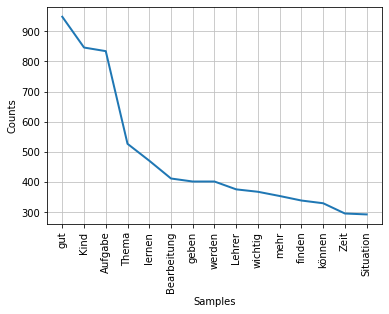

In [ ]:
# Check the most common words in graph
# Plus, we can see the useful feature of the lemmatization - tag.
#      If we were looking for nouns only, then we can give the condition after the for (word, lemma, pos)
# In a variable sentences_tok: Each sentence will be one list containing words.

from pprint import pprint
common  =  []
sentences_tok  =  [nltk.tokenize.word_tokenize ( sent )  for  sent  in  corpus]

for  sent  in  sentences_tok :
    tags  =  tagger.tag_sent(sent)
    comm_from_sent  =  [ lemma  for  ( word , lemma , pos )  in  tags]
    common.extend(comm_from_sent)

fdist  =  nltk.FreqDist (common)

# Most common 10 words
pprint (fdist.most_common ( 10 ))
# Graph most common 15 words
fdist.plot (15 , cumulative = False )

In [ ]:
# Visualization library
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk import ngrams
from collections import Counter

# A sample length - Number of samples without spaces in between
def plot_sample_length_distribution(sample_texts):
    """Plots the sample length distribution.

    # Arguments
        samples_texts: list, sample texts.
    """
    plt.hist([len(s.split()) for s in sample_texts], 50)
    plt.xlabel('Length of a sample')
    plt.ylabel('Number of samples')
    plt.title('Sample length distribution')
    plt.show()

In [ ]:
# Word frequency for unigram, bigram, and trigram.
def word_frequency(new_tokens):
    counted = Counter(new_tokens)
    counted_2 = Counter(ngrams(new_tokens, 2))
    counted_3 = Counter(ngrams(new_tokens, 3))

    word_freq = pd.DataFrame(counted.items(), columns = ['word', 'frequency']).sort_values(by = ['frequency'], ascending = False)
    word_pairs = pd.DataFrame(counted_2.items(), columns = ['pairs', 'frequency']).sort_values(by = ['frequency'], ascending = False)
    trigrams = pd.DataFrame(counted_3.items(), columns = ['trigrams', 'frequency']).sort_values(by = ['frequency'], ascending = False)
    return word_freq, word_pairs, trigrams

data2, data3, data4 = word_frequency(common)

In [ ]:
# Add another column of word_len in dataframe of unigram
data2['word_len'] = [len(w) for w in data2['word']]
data2 = data2.reset_index(drop = True)

In [ ]:
# Words lemmatized ordered in frequency with word_len information together
data2

,word,frequency,word_len
0,gut,948,3
1,Kind,846,4
2,Aufgabe,834,7
3,Thema,527,5
4,lernen,471,6
...,...,...,...
9203,Lucky,1,5
9204,Fotograf,1,8
9205,teamleit,1,8
9206,chefkoch,1,8


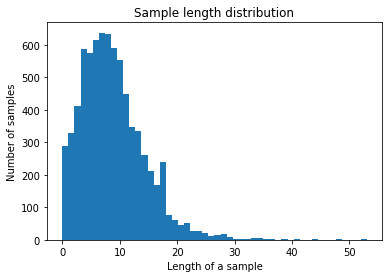

In [ ]:
# Visualization
# Length of a sample and Number of samples - how many words in each sentence

plot_sample_length_distribution(corpus)

Most of the sentences consist of 0-30 words.

In [ ]:
# Max, Min, Average length of the sentence
data['len']= data['sentence'].str.split().map(lambda x: len(x))
print('Max length: {}, Min length: {}, Average Length :  {}'.format(max(data['len']),min(data['len']),data['len'].mean()))

Max length: 121, Min length: 1, Average Length :  19.090288713910763


## N-grams
N-grams is the continuous sequence of words or symbols in a document.

If N == 1: unigram, N == 2: bigram, N == 3: trigram

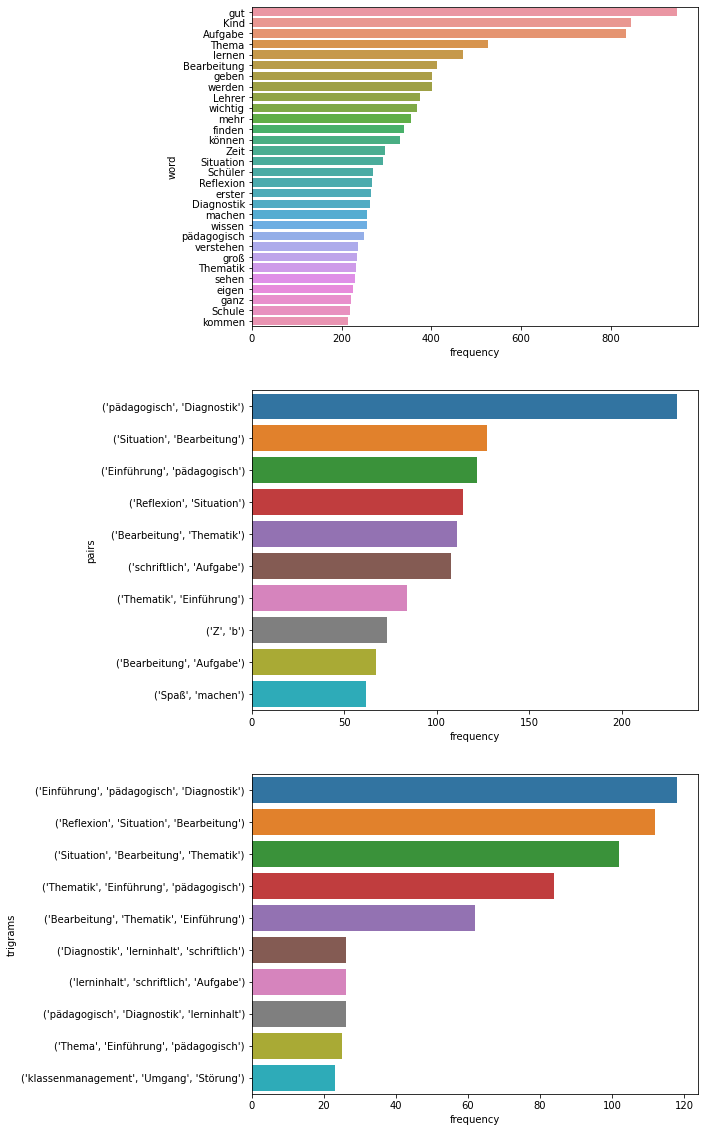

In [ ]:
# Word frequency
fig, axes = plt.subplots(3,1,figsize=(8,20))

sns.barplot(ax=axes[0],x='frequency',y='word',data= data2.head(30))
sns.barplot(ax=axes[1],x='frequency',y='pairs',data=data3.head(10))
sns.barplot(ax=axes[2],x='frequency',y='trigrams',data=data4.head(10))



# Machine learning

In [ ]:
from sklearn import naive_bayes, svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score

## Preprocessing - Bag of Words

As we are not using multiple documents rather all are combined in one document, TF/IDF does not have a power to impact a lot on the result. Therefore we chose BoW.

In [ ]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=2500)

# By changing the dataset from 1)stem_corpus, 2)lem_corpus, 3)lem_stem_corpus
#    Different accuracy results are below.

X = cv.fit_transform(lem_stem_corpus).toarray()
y = data['final']

In [ ]:
# Train-test set split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

## SVM

It is known to be well performing in text classification

In [ ]:
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(X_train,y_train)

# predict the labels on validation dataset
prediction_SVM = SVM.predict(X_test)

# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score -> ",accuracy_score(y_test, prediction_SVM))
print("SVM f1 Score -> ", f1_score(y_test, prediction_SVM, average = None))
print("SVM Cohen's Kappa -> ", cohen_kappa_score(y_test, prediction_SVM))

SVM Accuracy Score ->  0.4967191601049869
SVM f1 Score ->  [0.64171123 0.33333333 0.49492386 0.32751092 0.1875     0.28148148]
SVM Cohen's Kappa ->  0.30240852119257544


## Naive Bayes Classifier

It goes well with multinomial variant.

In [ ]:
Naive = naive_bayes.MultinomialNB()
Naive.fit(X_train,y_train)

# predict the labels on validation dataset
prediction_NB = Naive.predict(X_test)

# Use accuracy_score function to get the accuracy
print("Naive Bayes Accuracy Score -> ",accuracy_score(y_test, prediction_NB))
print("Naive Bayes f1 Score -> ", f1_score(y_test, prediction_NB, average = None))
print("Naive Bayes Cohen's Kappa -> ", cohen_kappa_score(y_test, prediction_NB))

Naive Bayes Accuracy Score ->  0.4816272965879265
Naive Bayes f1 Score ->  [0.61676159 0.20289855 0.5057232  0.2962963  0.11666667 0.32624113]
Naive Bayes Cohen's Kappa ->  0.27482598859439256


## Random Forest

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
prediction_RF = rf.predict(X_test)
print("Random Forest Accuracy Score -> ", accuracy_score(y_test, prediction_RF))
print("Random Forest f1 Score -> ", f1_score(y_test, prediction_RF, average = None))
print("Random Forest Cohen's Kappa -> ", cohen_kappa_score(y_test, prediction_RF))

Random Forest Accuracy Score ->  0.47112860892388453
Random Forest f1 Score ->  [0.62374245 0.34862385 0.44444444 0.14511041 0.07079646 0.18518519]
Random Forest Cohen's Kappa ->  0.23701076457690184


### Accuracy Scores by different dataset


[Lemmatization -> stemming]

* svm = 0.496719
* nb = 0.481627
* rf = 0.467191

    
[stemmed]
    
* svm = 0.496062
* nb = 0.501312
* rf = 0.473753

[Lemmatized]
    
* svm = 0.494094
* nb = 0.482283
* rf = 0.482283


### F1 Score by different dataset

F1 score = 2{(precision * recall)/ (precision + recall)}

[Lemmatization -> stemming]

* svm = [0.64171123 0.33333333 0.49492386 0.32751092 0.1875     0.28148148]
* nb = [0.61676159 0.20289855 0.5057232  0.2962963  0.11666667 0.32624113]
* rf = [0.62176871 0.30841121 0.44389642 0.16969697 0.03669725 0.21052632]

    
[stemmed]
    
* svm = [0.64626866 0.30150754 0.4507772  0.3580786  0.22516556 0.3125    ]
* nb = [0.61676159 0.20289855 0.5057232  0.2962963  0.11666667 0.32624113]
* rf = [0.61964039 0.34418605 0.46078431 0.1497006  0.05172414 0.34710744]


[Lemmatized]
    
* svm = [0.64427481 0.33502538 0.48621554 0.329718   0.14473684 0.26153846]
* nb = [0.61676159 0.20289855 0.5057232  0.2962963  0.11666667 0.32624113]
* rf = [0.64337508 0.30046948 0.44730077 0.16969697 0.07272727 0.18      ]

### Cohen's Kappa by different dataset

rater1: Real observation
rater2: Model prediction
(rater1, rater2 can be switched as well)

Po = Agreement between rater 1, rater 2: TP and TN

pe = Agreement between rater 1 and rater 2 by chance: (Rater1 positive * Rater2 positive) + (Rater1 negative * Rater2 negative)


<Kappa: Agreement>

<0: Less than chance agreement

0.01 - 0.20: Slight agreement

0.21 - 0.40: Fair agreement

0.41 - 0.60: Moderate agreement

0.61 - 0.80: Substantial agreement

0.81 - 0.99: Almost perfect agreement



[Lemmatization -> stemming]

* svm = 0.302408
* nb = 0.274825
* rf = 0.233542

    
[stemmed]
    
* svm = 0.297399
* nb = 0.309497
* rf = 0.247251


[Lemmatized]
    
* svm = 0.297042
* nb = 0.276526
* rf = 0.249603

# Bert Classification

At this step we will be importing the libraries and modules needed to run our script. Libraries are:

*   Pandas

*   Pytorch
*   Pytorch Utils for Dataset and Dataloader

*   Transformers
*   tqdm

*   sklearn
*   Bert Model and Tokenizer









In [ ]:
!pip install folium

In [ ]:
!pip install -q transformers datasets

In [ ]:
!pip install transformers==3.0.2

In [ ]:
# Importing the libraries needed
import torch
import seaborn as sns
import transformers
import json
from tqdm import tqdm
from torch.utils.data import Dataset, DataLoader
from transformers import BertModel, BertTokenizer
import logging
from datasets import load_dataset
logging.basicConfig(level=logging.ERROR)

In [ ]:
# Setting up the device for GPU usage
from torch import cuda
device = 'cuda' if cuda.is_available() else 'cpu'

In [ ]:
train = pd.read_csv('sentences_all_hand.tsv', delimiter='\t')

In [ ]:
train.shape

(7620, 6)

In [ ]:
train.drop(train.columns[[0]], axis=1, inplace=True)

In [ ]:
train.head()

,corpus_id,sentence_id,sentence,options,final
0,0,0.0,Zunächst habe ich meinen Arbeitsplatz vorberei...,"0,2",0
1,0,1.0,Anschließend las ich das Fallbeispiel mehrmals...,0,0
2,0,2.0,Ich bin neutral und offen an die Aufgabe heran...,"0,1",1
3,0,3.0,Nachdem ich zunächst die Aufgabe ohne Lerninha...,"0,2",2
4,0,4.0,"Die Tipps haben mir sehr geholfen, um meine Lö...",2,2


In [ ]:
train['final'].unique()

array([0, 1, 2, 3, 5, 4])

In [ ]:
train.describe()

,corpus_id,sentence_id,final
count,7620.000000,7619.000000,7620.000000
mean,2.106299,1164.972700,1.564173
std,1.451581,983.185163,1.525976
min,0.000000,0.000000,0.000000
25%,1.000000,358.000000,0.000000
50%,3.000000,911.000000,2.000000
75%,3.000000,1688.500000,3.000000
max,5.000000,3593.000000,5.000000


In [ ]:
new_df = train[['sentence', 'final']]

In [ ]:
# Defining some key variables that will be used later on in the training
MAX_LEN = 256
TRAIN_BATCH_SIZE = 8
VALID_BATCH_SIZE = 4

LEARNING_RATE = 1e-05
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-uncased', do_lower_case=True)

Downloading:   0%|          | 0.00/872k [00:00<?, ?B/s]

In [ ]:
class SentimentData(Dataset):
    def __init__(self, dataframe, tokenizer, max_len):
        self.tokenizer = tokenizer
        self.data = dataframe
        self.text = dataframe.sentence
        self.targets = self.data.final
        self.max_len = max_len

    def __len__(self):
        return len(self.text)

    def __getitem__(self, index):
        text = str(self.text[index])
        text = " ".join(text.split())
        #encode_plus method to perform tokenization
        inputs = self.tokenizer.encode_plus(
            text,
            None,
            add_special_tokens=True,
            max_length=self.max_len,
            pad_to_max_length=True,
            return_token_type_ids=True
        )
        ids = inputs['input_ids']
        mask = inputs['attention_mask']
        token_type_ids = inputs["token_type_ids"]


        return {
            'ids': torch.tensor(ids, dtype=torch.long),
            'mask': torch.tensor(mask, dtype=torch.long),
            'token_type_ids': torch.tensor(token_type_ids, dtype=torch.long),
            'targets': torch.tensor(self.targets[index], dtype=torch.float)
        }

In [ ]:
train_size = 0.8
train_data=new_df.sample(frac=train_size,random_state=200)
#declared to evaluate the performance of the model
test_data=new_df.drop(train_data.index).reset_index(drop=True)
train_data = train_data.reset_index(drop=True)


print("FULL Dataset: {}".format(new_df.shape))
print("TRAIN Dataset: {}".format(train_data.shape))
print("TEST Dataset: {}".format(test_data.shape))

training_set = SentimentData(train_data, tokenizer, MAX_LEN)
testing_set = SentimentData(test_data, tokenizer, MAX_LEN)

FULL Dataset: (7620, 2)
TRAIN Dataset: (6096, 2)
TEST Dataset: (1524, 2)


In [ ]:
train_params = {'batch_size': TRAIN_BATCH_SIZE,
                'shuffle': True,
                'num_workers': 0
                }

test_params = {'batch_size': VALID_BATCH_SIZE,
                'shuffle': True,
                'num_workers': 0
                }

#Dataloader is used to for creating training and validation dataloader that load data to the neural network in a defined manner.
training_loader = DataLoader(training_set, **train_params)
testing_loader = DataLoader(testing_set, **test_params)

In [ ]:
class BERTClass(torch.nn.Module):
    def __init__(self):
        super(BERTClass, self).__init__()
        self.l1 = BertModel.from_pretrained("bert-base-multilingual-uncased")
        self.pre_classifier = torch.nn.Linear(768, 768)
        self.dropout = torch.nn.Dropout(0.3)
        self.classifier = torch.nn.Linear(768, 6)

    def forward(self, input_ids, attention_mask, token_type_ids):
        output_1 = self.l1(input_ids=input_ids, attention_mask=attention_mask, token_type_ids=token_type_ids)
        hidden_state = output_1[0]
        pooler = hidden_state[:, 0]
        pooler = self.pre_classifier(pooler)
        pooler = torch.nn.ReLU()(pooler)
        pooler = self.dropout(pooler)
        output = self.classifier(pooler)
        return output

In [ ]:
model = BERTClass()
model.to(device)

Downloading:   0%|          | 0.00/625 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/672M [00:00<?, ?B/s]

BERTClass(
  (l1): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(105879, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
   

In [ ]:
# Creating the loss function and optimizer
loss_function = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params =  model.parameters(), lr=LEARNING_RATE)

In [ ]:
def calcuate_accuracy(preds, targets):
    n_correct = (preds==targets).sum().item()
    return n_correct

In [ ]:
# Defining the training function on the 80% of the dataset for tuning the distilbert model

def train(epoch):
    tr_loss = 0
    n_correct = 0
    nb_tr_steps = 0
    nb_tr_examples = 0
    model.train()
    for _,data in tqdm(enumerate(training_loader, 0)):
        ids = data['ids'].to(device, dtype = torch.long)
        mask = data['mask'].to(device, dtype = torch.long)
        token_type_ids = data['token_type_ids'].to(device, dtype = torch.long)
        targets = data['targets'].to(device, dtype = torch.long)

        outputs = model(ids, mask, token_type_ids)
        loss = loss_function(outputs, targets)
        tr_loss += loss.item()
        big_val, big_idx = torch.max(outputs.data, dim=1)
        n_correct += calcuate_accuracy(big_idx, targets)

        nb_tr_steps += 1
        nb_tr_examples+=targets.size(0)

        if _%5000==0:
            loss_step = tr_loss/nb_tr_steps
            accu_step = (n_correct*100)/nb_tr_examples
            print(f"Training Loss per 5000 steps: {loss_step}")
            print(f"Training Accuracy per 5000 steps: {accu_step}")

        optimizer.zero_grad()
        loss.backward()
        # # When using GPU
        optimizer.step()

    print(f'The Total Accuracy for Epoch {epoch}: {(n_correct*100)/nb_tr_examples}')
    epoch_loss = tr_loss/nb_tr_steps
    epoch_accu = (n_correct*100)/nb_tr_examples
    print(f"Training Loss Epoch: {epoch_loss}")
    print(f"Training Accuracy Epoch: {epoch_accu}")

    return

In [ ]:
EPOCHS = 1
for epoch in range(EPOCHS):
    train(epoch)

0it [00:00, ?it/s]

Training Loss per 5000 steps: 1.8402245044708252
Training Accuracy per 5000 steps: 0.0


762it [04:55,  2.58it/s]

The Total Accuracy for Epoch 0: 53.70734908136483
Training Loss Epoch: 1.2391365157572303
Training Accuracy Epoch: 53.70734908136483


In [ ]:
def valid(model, testing_loader):
    model.eval()
    n_correct = 0; n_wrong = 0; total = 0; tr_loss=0; nb_tr_steps=0; nb_tr_examples=0
    with torch.no_grad():
        for _, data in tqdm(enumerate(testing_loader, 0)):
            ids = data['ids'].to(device, dtype = torch.long)
            mask = data['mask'].to(device, dtype = torch.long)
            token_type_ids = data['token_type_ids'].to(device, dtype=torch.long)
            targets = data['targets'].to(device, dtype = torch.long)
            outputs = model(ids, mask, token_type_ids).squeeze()
            loss = loss_function(outputs, targets)
            tr_loss += loss.item()
            big_val, big_idx = torch.max(outputs.data, dim=1)
            n_correct += calcuate_accuracy(big_idx, targets)

            nb_tr_steps += 1
            nb_tr_examples+=targets.size(0)

            if _%5000==0:
                loss_step = tr_loss/nb_tr_steps
                accu_step = (n_correct*100)/nb_tr_examples
                print(f"Validation Loss per 100 steps: {loss_step}")
                print(f"Validation Accuracy per 100 steps: {accu_step}")
    epoch_loss = tr_loss/nb_tr_steps
    epoch_accu = (n_correct*100)/nb_tr_examples
    print(f"Validation Loss Epoch: {epoch_loss}")
    print(f"Validation Accuracy Epoch: {epoch_accu}")

    return epoch_accu


In [ ]:
acc = valid(model, testing_loader)
print("Accuracy on test data = %0.2f%%" % acc)

2it [00:00, 15.10it/s]

Validation Loss per 100 steps: 1.1971962451934814
Validation Accuracy per 100 steps: 50.0


381it [00:27, 13.76it/s]

Validation Loss Epoch: 1.0693955353786313
Validation Accuracy Epoch: 59.58005249343832
Accuracy on test data = 59.58%


# Bert Multi-label Classification

In [ ]:
# Train, Test, Validation set
# To get the dataset format, import the data in csv format made in previous code.
dataset = load_dataset('csv', data_files='sentences_all_hand.csv')

  0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
dataset

DatasetDict({
    train: Dataset({
        features: ['sentence_id', 'sentence', '0', '1', '2', '3', '4', '5'],
        num_rows: 7620
    })
})

In [ ]:
# Originally dataset consists of one dataset - named 'train' in total
# Split train and test dataset
train_dataset, test_dataset= dataset['train'].train_test_split(test_size=0.2).values()

In [ ]:
# Split train and validation dataset in a train dataset
train_dataset, validation_dataset = train_dataset.train_test_split(test_size = 0.2).values()

In [ ]:
train_dataset

Dataset({
    features: ['sentence_id', 'sentence', '0', '1', '2', '3', '4', '5'],
    num_rows: 4876
})

In [ ]:
test_dataset

Dataset({
    features: ['sentence_id', 'sentence', '0', '1', '2', '3', '4', '5'],
    num_rows: 1524
})

In [ ]:
validation_dataset

Dataset({
    features: ['sentence_id', 'sentence', '0', '1', '2', '3', '4', '5'],
    num_rows: 1220
})

In [ ]:
from datasets import Dataset
from datasets.dataset_dict import DatasetDict
dataset = DatasetDict({'train': train_dataset, 'test': test_dataset, 'validation': validation_dataset})

In [ ]:
# Make the column for labeling.

labels = [label for label in dataset['train'].features.keys() if label not in ['sentence_id', 'sentence']]
id2label = {idx:label for idx, label in enumerate(labels)}
label2id = {label:idx for idx, label in enumerate(labels)}

In [ ]:
labels

['0', '1', '2', '3', '4', '5']

In [ ]:
dataset

DatasetDict({
    train: Dataset({
        features: ['sentence_id', 'sentence', '0', '1', '2', '3', '4', '5'],
        num_rows: 4876
    })
    test: Dataset({
        features: ['sentence_id', 'sentence', '0', '1', '2', '3', '4', '5'],
        num_rows: 1524
    })
    validation: Dataset({
        features: ['sentence_id', 'sentence', '0', '1', '2', '3', '4', '5'],
        num_rows: 1220
    })
})

In [ ]:
dataset['train']['sentence'][:10]

['Während dies ein lustiges Konzept ist, ist es eigentlich ein großartiges Beispiel dafür, warum es so wichtig ist, ein "tiefes Verständnis für grundlegende Mathematik" zu haben.',
 'Vom Lösungsbogen im Anschluss an die Abgabe war ich überrascht, da mir dieses Mal viele der der vorgeschlagenen Lösungen tatsächlich nicht eingefallen sind.',
 'Denn ich habe mir zuallererst die Aufgabe einmal kurz durchgelesen, um zu verstehen um welche Situation es sich handelt und meine ersten Gedanken (ohne das Wissen der Folien oder der Literatur) aufgeschrieben.',
 'Wie man mit Störungen umgeht, finde ich zwar schon interessant, abgesehen vom sehr praktisch gehaltenen Text von Lohmann und einigen Passagen von Becker, hatte ich allerdings nicht den Eindruck, dass mir die Literatur für eine reale Konfliktsituation weitergeholfen hätte, da die darin beschriebenen Handlungsvorschläge m.E. zu wenig konkret und zu abstrakt formuliert sind, oder auch schlichtweg nicht umsetzbar, da dafür vermutlich gar nich

In [ ]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("bert-base-multilingual-uncased", do_lower_case = True)

def preprocess_data(examples):
  # take a batch of texts
  text = examples["sentence"]
  # encode them
  encoding = tokenizer(text, padding="max_length", truncation=True, max_length=128)
  # add labels
  labels_batch = {k: examples[k] for k in examples.keys() if k in labels}
  # create numpy array of shape (batch_size, num_labels)
  labels_matrix = np.zeros((len(text), len(labels)))
  # fill numpy array
  for idx, label in enumerate(labels):
    labels_matrix[:, idx] = labels_batch[label]

  encoding["labels"] = labels_matrix.tolist()

  return encoding

loading configuration file https://huggingface.co/bert-base-multilingual-uncased/resolve/main/config.json from cache at /root/.cache/huggingface/transformers/af4e101d208f361f141144dca21e9c4148aaf0e85441c2e335743d10829c6cad.d63adade93e44e64bedd306ec82ffd33eedabaf0ff08aabe581acaa48616a508
Model config BertConfig {
  "_name_or_path": "bert-base-multilingual-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "directionality": "bidi",
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "pooler_fc_size": 768,
  "pooler_num_attention_heads": 12,
  "pooler_num_fc_layers": 3,
  "pooler_size_per_head": 128,
  "pooler_type": "first_token_transform",
  "position_embedding_type": 

In [ ]:
encoded_dataset = dataset.map(preprocess_data, batched=True, remove_columns=dataset['train'].column_names)

  0%|          | 0/5 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?ba/s]

In [ ]:
encoded_dataset

In [ ]:
example = encoded_dataset['train'][0]
print(example.keys())

dict_keys(['input_ids', 'token_type_ids', 'attention_mask', 'labels'])


In [ ]:
tokenizer.decode(example['input_ids'])

'[CLS] wahrend dies ein lustiges konzept ist, ist es eigentlich ein großartiges beispiel dafur, warum es so wichtig ist, ein " tiefes verstandnis fur grundlegende mathematik " zu haben. [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]'

In [ ]:
example['labels']

[0.0, 0.0, 1.0, 0.0, 0.0, 0.0]

In [ ]:
[id2label[idx] for idx, label in enumerate(example['labels']) if label == 1.0]

['2']

In [ ]:
encoded_dataset.set_format("torch")

## Define model

In [ ]:
from transformers import AutoModelForSequenceClassification

model = AutoModelForSequenceClassification.from_pretrained("bert-base-multilingual-uncased",
                                                           problem_type="multi_label_classification",
                                                           num_labels=len(labels),
                                                           id2label=id2label,
                                                           label2id=label2id)

loading configuration file https://huggingface.co/bert-base-multilingual-uncased/resolve/main/config.json from cache at /root/.cache/huggingface/transformers/af4e101d208f361f141144dca21e9c4148aaf0e85441c2e335743d10829c6cad.d63adade93e44e64bedd306ec82ffd33eedabaf0ff08aabe581acaa48616a508
Model config BertConfig {
  "_name_or_path": "bert-base-multilingual-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "directionality": "bidi",
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "0",
    "1": "1",
    "2": "2",
    "3": "3",
    "4": "4",
    "5": "5"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "0": 0,
    "1": 1,
    "2": 2,
    "3": 3,
    "4": 4,
    "5": 5
  },
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id":

## Train the model

In [ ]:
batch_size = 8
metric_name = "f1"

In [ ]:
from transformers import TrainingArguments, Trainer

args = TrainingArguments(
    f"bert-finetuned-sem_eval-german",
    evaluation_strategy = "epoch",
    save_strategy = "epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    num_train_epochs=5,
    weight_decay=0.01,
    load_best_model_at_end=True,
    metric_for_best_model=metric_name,
    #push_to_hub=True,
)

PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).


In [ ]:
from sklearn.metrics import roc_auc_score
from transformers import EvalPrediction

# source: https://jesusleal.io/2021/04/21/Longformer-multilabel-classification/
def multi_label_metrics(predictions, labels, threshold=0.5):
    # first, apply sigmoid on predictions which are of shape (batch_size, num_labels)
    sigmoid = torch.nn.Sigmoid()
    probs = sigmoid(torch.Tensor(predictions))
    # next, use threshold to turn them into integer predictions
    y_pred = np.zeros(probs.shape)
    y_pred[np.where(probs >= threshold)] = 1
    # finally, compute metrics
    y_true = labels
    f1_micro_average = f1_score(y_true=y_true, y_pred=y_pred, average='micro')
    roc_auc = roc_auc_score(y_true, y_pred, average = 'micro')
    accuracy = accuracy_score(y_true, y_pred)
    # return as dictionary
    metrics = {'f1': f1_micro_average,
               'roc_auc': roc_auc,
               'accuracy': accuracy}
    return metrics

def compute_metrics(p: EvalPrediction):
    preds = p.predictions[0] if isinstance(p.predictions,
            tuple) else p.predictions
    result = multi_label_metrics(
        predictions=preds,
        labels=p.label_ids)
    return result

In [ ]:
encoded_dataset['train'][0]['labels'].type()

'torch.FloatTensor'

In [ ]:
encoded_dataset['train']['input_ids'][0]

tensor([  101, 12407, 13015, 10299, 71890, 40110, 56074, 10339,   117, 10339,
        10153, 46413, 10299, 25858, 46378, 13217, 20405, 23986,   117, 89628,
        10153, 10297, 82427, 10339,   117, 10299,   107, 66623, 10107, 12541,
        76042, 10325, 16842, 46283, 10282, 56282,   107, 10331, 13576,   119,
          102,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0])

In [ ]:
#forward pass
outputs = model(input_ids=encoded_dataset['train']['input_ids'][0].unsqueeze(0), labels=encoded_dataset['train'][0]['labels'].unsqueeze(0))
outputs

SequenceClassifierOutput([('loss',
                           tensor(0.6589, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)),
                          ('logits',
                           tensor([[-0.1006,  0.0285, -0.0691, -0.2391, -0.2266,  0.0268]],
                                  grad_fn=<AddmmBackward0>))])

In [ ]:
trainer = Trainer(
    model,
    args,
    train_dataset=encoded_dataset["train"],
    eval_dataset=encoded_dataset["validation"],
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

In [ ]:
trainer.train()

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:310: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,
***** Running training *****
  Num examples = 4876
  Num Epochs = 5
  Instantaneous batch size per device = 8
  Total train batch size (w. parallel, distributed & accumulation) = 8
  Gradient Accumulation steps = 1
  Total optimization steps = 3050


Epoch,Training Loss,Validation Loss


KeyboardInterrupt: ignored

In [ ]:
trainer.evaluate()

In [ ]:
y_pred = trainer.predict(encoded_dataset['test']).predictions

***** Running Prediction *****
  Num examples = 1524
  Batch size = 8


# Model Evaluation
1. Hamming Loss
2. Average precision
3. Average recall
4. Average f1

In [ ]:
# Define the true
y_true = encoded_dataset["test"]["labels"].tolist()
y_pred = y_pred.tolist()

y_pred=np.argmax(y_pred, axis=1)
y_true=np.argmax(y_true, axis=1)

In [ ]:
# Hamming loss
from sklearn.metrics import hamming_loss

metrics.hamming_loss(y_true, y_pred)

0.41272965879265094

In [ ]:
# Classification report
from sklearn.metrics import classification_report

label_names = ['0', '1', '2', '3', '4', '5']
print(classification_report(y_true, y_pred,target_names=label_names))

# Weighted average: mean average considering the actual number of the labels(support)
# Macro average: Unweighted average

              precision    recall  f1-score   support

           0       0.78      0.68      0.73       788
           1       0.52      0.42      0.47       128
           2       0.47      0.53      0.50       364
           3       0.32      0.46      0.38       167
           4       0.00      0.00      0.00        28
           5       0.42      0.67      0.52        49

    accuracy                           0.59      1524
   macro avg       0.42      0.46      0.43      1524
weighted avg       0.61      0.59      0.59      1524

